In [1]:
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
!python -m spacy download en_core_web_sm

                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB 1.3 MB/s eta 0:00:10
                                              0.1/12.8 MB 1.2 MB/s eta 0:00:11
                                              0.3/12.8 MB 2.0 MB/s eta 0:00:07
     -                                        0.5/12.8 MB 2.9 MB/s eta 0:00:05
     ---                                      1.0/12.8 MB 4.3 MB/s eta 0:00:03
     -----                                    1.6/12.8 MB 5.7 MB/s eta 0:00:02
     ------                                   2.2/12.8 MB 6.6 MB/s eta 0:00:02
     --------                                 2.7/12.8 MB 7.3 MB/s eta 0:00:02
     ----------                               3.3/12.8 MB 7.8 MB/s eta 0:00:02
     ------------                             3.9/12.8 MB 8.2 MB/s eta 0:00:02
     -------------                            4.4/12.8 MB 8.5 MB/s eta 0:00:01
     ---------------                          4.9/12.8 MB 8

In [3]:
#Load spacy language model
NER = spacy.load("en_core_web_sm")

In [4]:
## Load books

In [5]:
import os 
#Locate all books in directory
all_books = [b for b in os.scandir('data') if ".txt" in b.name]

In [6]:
all_books

[<DirEntry 'B - The Sword of Destiny.txt'>,
 <DirEntry 'C - The Last Wish.txt'>,
 <DirEntry 'E - something ends something begins.txt'>,
 <DirEntry 'I - Blood of Elves.txt'>,
 <DirEntry 'II - Times of Contempt.txt'>,
 <DirEntry 'III - Baptism of Fire.txt'>,
 <DirEntry 'IV - The Tower of the Swallow.txt'>,
 <DirEntry 'V - The Lady of the Lake.txt'>]

In [7]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

In [8]:
#Visualize identifiec entities
displacy.render(book_doc[0:2000], style = 'ent', jupyter = True)

In [9]:
##Load character names

In [10]:
#Read character names
character_df = pd.read_csv('character_sheet.csv')

In [11]:
#Remove bracket
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))
character_df['firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0]) 

In [12]:
pd.set_option('display.max_rows', None)
character_df

book   
0                   Category:Baptism of Fire characters  \
1                   Category:Baptism of Fire characters   
2                   Category:Baptism of Fire characters   
3                   Category:Baptism of Fire characters   
4                   Category:Baptism of Fire characters   
5                   Category:Baptism of Fire characters   
6                   Category:Baptism of Fire characters   
7                   Category:Baptism of Fire characters   
8                   Category:Baptism of Fire characters   
9                   Category:Baptism of Fire characters   
10                  Category:Baptism of Fire characters   
11                  Category:Baptism of Fire characters   
12                  Category:Baptism of Fire characters   
13                  Category:Baptism of Fire characters   
14                  Category:Baptism of Fire characters   
15                  Category:Baptism of Fire characters   
16                  Category:Baptism of Fire characters   
17                  Category:Baptism of Fire characters   
18                  Category:Baptism of Fire characters   
19                  Category:Baptism of Fire characters   
20                  Category:Baptism of Fire characters   
21                  Category:Baptism of Fire characters   
22                  Category:Baptism of Fire characters   
23                  Category:Baptism of Fire characters   
24                  Category:Baptism of Fire characters   
25                  Category:Baptism of Fire characters   
26                  Category:Baptism of Fire characters   
27                  Category:Baptism of Fire characters   
28                  Category:Baptism of Fire characters   
29                  Category:Baptism of Fire characters   
30                  Category:Baptism of Fire characters   
31                  Category:Baptism of Fire characters   
32                  Category:Baptism of Fire characters   
33                  Category:Baptism of Fire characters   
34                  Category:Baptism of Fire characters   
35                  Category:Baptism of Fire characters   
36                  Category:Baptism of Fire characters   
37                  Category:Baptism of Fire characters   
38                  Category:Baptism of Fire characters   
39                  Category:Baptism of Fire characters   
40                  Category:Baptism of Fire characters   
41                  Category:Baptism of Fire characters   
42                  Category:Baptism of Fire characters   
43                  Category:Baptism of Fire characters   
44                  Category:Baptism of Fire characters   
45                  Category:Baptism of Fire characters   
46                  Category:Baptism of Fire characters   
47                  Category:Baptism of Fire characters   
48                  Category:Baptism of Fire characters   
49                  Category:Baptism of Fire characters   
50                  Category:Baptism of Fire characters   
51                  Category:Baptism of Fire characters   
52                  Category:Baptism of Fire characters   
53                  Category:Baptism of Fire characters   
54                  Category:Baptism of Fire characters   
55                  Category:Baptism of Fire characters   
56                  Category:Baptism of Fire characters   
57                  Category:Baptism of Fire characters   
58                  Category:Baptism of Fire characters   
59                  Category:Baptism of Fire characters   
60                  Category:Baptism of Fire characters   
61                  Category:Baptism of Fire characters   
62                  Category:Baptism of Fire characters   
63                  Category:Baptism of Fire characters   
64                  Category:Baptism of Fire characters   
65                  Category:Baptism of Fire characters   
66                  Category:Baptism of Fire characters   
67                  Category:Baptism of

In [13]:
## Get named entity list per sentence

In [14]:
sentence_entity_df = []
#Loop through each sentence and add
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sentence_entity_df.append({"sentence": sent, "entities": entity_list})

sentence_entity_df = pd.DataFrame(sentence_entity_df)

In [15]:
sentence_entity_df

sentence   
0     (ï»¿'Does, she, always, devour, her, victims, ...  \
1     (Velerad, spat, vehemently, on, the, straw, .,...   
2     (', Come, on, ,, Geralt, ,, it, 'll, be, suppe...   
3                                             (Pish, !)   
4     (Devours, ,, takes, a, bite, ,, leaves, aside,...   
5     (She, only, bit, the, head, from, one, ,, gutt...   
6     (Damned, mother's-, !, ', \n\n, ', Careful, ,,...   
7     (', Say, what, you, want, about, the, striga, ...   
8     (', Has, anyone, she, 's, attacked, survived, ...   
9     (The, witcher, asked, ,, apparently, paying, n...   
10    (Segelin, and, Ostrit, looked, at, each, other...   
11           (', Yes, ,, ', said, the, bearded, man, .)   
12    (', At, the, very, beginning, ,, seven, years,...   
13                             (One, escaped-, ', \n\n)   
14    (And, then, ,, ', interrupted, Velerad, ,, ', ...   
15        (You, \n, remember, ., ., ., ?, ', \n\n \n\n)   
16    (IV, \n\n \n\n, The, following, day, ,, late, ...   
17    (He, was, led, in, by, a, soldier, in, a, hood...   
18    (The, conversation, did, not, yield, any, sign...   
19    (The, miller, was, terrified, ;, he, mumbled, ...   
20    (The, striga, could, open, her, \n, jaws, impr...   
21    (Her, claws, were, sharper, than, a, wildcat, ...   
22    (And, \n, it, was, only, because, of, that, th...   
23    (Having, finished, his, examination, Geralt, n...   
24    (The, soldier, pushed, the, peasant, through, ...   
25                 (It, was, Foltest, himself, ., \n\n)   
26    (', Sit, ,, do, not, get, up, ,, ', said, the,...   
27                  (', This, visit, is, unofficial, .)   
28           (Are, you, happy, with, the, interview, ?)   
29    (I, \n, heard, you, were, at, the, palace, thi...   
30               (', Yes, ,, your, Majesty, ., ', \n\n)   
31    (', When, will, you, set, about, your, task, ?...   
32    (', It, is, four, days, until, the, full, moon...   
33                            (After, that, ., ', \n\n)   
34    (', You, prefer, to, have, a, look, at, her, y...   
35                          (', There, is, no, need, .)   
36    (But, having, had, her, fill, the-, the, princ...   
37        (', Striga, ,, master, witcher, ,, striga, .)   
38               (Let, us, not, play, at, diplomacy, .)   
39      (She, will, be, a, princess, afterwards, ., \n)   
40    (And, that, is, what, I, have, come, to, talk,...   
41    (Answer, me, unofficially, ,, briefly, and, cl...   
42      (Do, n't, hide, behind, your, code, ., ', \n\n)   
43                 (Geralt, rubbed, his, brow, ., \n\n)   
44    (', I, confirm, ,, your, Majesty, ,, that, the...   
45    (And, ,, unless, I, am, mistaken, ,, it, can, ...   
46    (The, third, crowing, of, the, cock, ,, as, lo...   
47    (That, is, what, is, usually, done, with, \n, ...   
48                          (', So, simple, ?, ', \n\n)   
49                          (', It, is, not, simple, .)   
50       (First, you, have, to, survive, the, night, .)   
51    (Then, there, are, exceptions, to, the, rule, ...   
52                                   (Consecutively, .)   
53       (There, are, also, cases, which, are, ., ., .)   
54                                  (well, ., ., ., \n)   
55                               (hopeless, ., ', \n\n)   
56                    (Yes, ,, ', Foltest, bristled, .)   
57    (', I, keep, hearing, that, from, some, people...   
58    (Kill, the, monster, because, it, 's, an, \n, ...   
59    (Master, witcher, ,, I, \n\n, am, sure, they, ...   
60                                    (Am, I, right, ?)   
61    (Hack, the, man, -, eater, to, death, without,...   
62     (I, wo, n't, pay, ,, but, \n\n\n, they, will, .)   
63                                (Very, convenient, .)   
64                                      (And, cheap, .)   
65    (Because, the, king, will, order, the, witcher...   
66    (', The, king, unconditionally, orders, the, w...   
67                          (Geralt

In [16]:
#Filter out non-characters
def filter_entities(ent_list, character_df):
    return [ent for ent in ent_list
            if ent in list(character_df.character)
            or ent in list(character_df.firstname)]

In [17]:
filter_entities(['Segelin', 'Adu', 'Vjp'], character_df)

['Segelin']

In [18]:
sentence_entity_df['character_entities'] = sentence_entity_df['entities'].apply(lambda x: filter_entities(x, character_df))

#Filter out sentences having no entities 
sentence_entity_df_filtered = sentence_entity_df[sentence_entity_df['character_entities'].map(len) > 0]
sentence_entity_df_filtered.head(10)

sentence   
1   (Velerad, spat, vehemently, on, the, straw, .,...  \
2   (', Come, on, ,, Geralt, ,, it, 'll, be, suppe...   
6   (Damned, mother's-, !, ', \n\n, ', Careful, ,,...   
7   (', Say, what, you, want, about, the, striga, ...   
10  (Segelin, and, Ostrit, looked, at, each, other...   
14  (And, then, ,, ', interrupted, Velerad, ,, ', ...   
23  (Having, finished, his, examination, Geralt, n...   
25               (It, was, Foltest, himself, ., \n\n)   
43               (Geralt, rubbed, his, brow, ., \n\n)   
67                        (Geralt, grimaced, ., \n\n)   

                      entities character_entities  
1                    [Velerad]          [Velerad]  
2                     [Geralt]           [Geralt]  
6   [Careful, Velerad, Ostrit]  [Velerad, Ostrit]  
7                       [Adda]             [Adda]  
10           [Segelin, Ostrit]  [Segelin, Ostrit]  
14                   [Velerad]          [Velerad]  
23            [Geralt, miller]           [Geralt]  
25                   [Foltest]          [Foltest]  
43                    [Geralt]           [Geralt]  
67                    [Geralt]           [Geralt]

In [19]:
#Take only first name of characters 
sentence_entity_df_filtered['character_entities'] = sentence_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])

C:\Users\ACER\AppData\Local\Temp\ipykernel_12592\3966833355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentence_entity_df_filtered['character_entities'] = sentence_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])


In [20]:
pd.reset_option('^display.', silent = True)
sentence_entity_df_filtered

sentence   
1     (Velerad, spat, vehemently, on, the, straw, .,...  \
2     (', Come, on, ,, Geralt, ,, it, 'll, be, suppe...   
6     (Damned, mother's-, !, ', \n\n, ', Careful, ,,...   
7     (', Say, what, you, want, about, the, striga, ...   
10    (Segelin, and, Ostrit, looked, at, each, other...   
...                                                 ...   
8884                       (She, turned, to, Geralt, .)   
8886                               (', Geralt, ., ., .)   
8887  (Iola-, ', \n\n, ', Do, n't, say, anything, ,,...   
8889               (Geralt, ,, do, n't, go, ., ', \n\n)   
8899                       (So, long, ,, Nenneke, ., ')   

                        entities character_entities  
1                      [Velerad]          [Velerad]  
2                       [Geralt]           [Geralt]  
6     [Careful, Velerad, Ostrit]  [Velerad, Ostrit]  
7                         [Adda]             [Adda]  
10             [Segelin, Ostrit]  [Segelin, Ostrit]  
...                          ...                ...  
8884                    [Geralt]           [Geralt]  
8886                    [Geralt]           [Geralt]  
8887                   [Nenneke]          [Nenneke]  
8889                    [Geralt]           [Geralt]  
8899                   [Nenneke]          [Nenneke]  

[1386 rows x 3 columns]

In [21]:
## Create Relationships

In [22]:
window_size = 5
relationship = []

for i in range(sentence_entity_df_filtered.index[-1]):
    end_i =  min(i+5, sentence_entity_df_filtered.index[-1])
    char_list = sum((sentence_entity_df_filtered.loc[i: end_i].character_entities), [])

    unique = [char_list[i] for i in range(len(char_list))
                           if i == 0 or char_list[i] != char_list[i-1]]
    if(len(unique)) > 1:
        for index, a in enumerate(unique[:-1]):
            b = unique[index + 1]
            relationship.append({"source": a, "target": b})

In [23]:
relationship_df = pd.DataFrame(relationship)

In [24]:
pd.set_option('display.max_rows', None)
relationship_df

source       target
0         Velerad       Geralt
1         Velerad       Geralt
2          Geralt      Velerad
3         Velerad       Ostrit
4          Geralt      Velerad
5         Velerad       Ostrit
6          Ostrit         Adda
7         Velerad       Ostrit
8          Ostrit         Adda
9         Velerad       Ostrit
10         Ostrit         Adda
11        Velerad       Ostrit
12         Ostrit         Adda
13           Adda      Segelin
14        Segelin       Ostrit
15        Velerad       Ostrit
16         Ostrit         Adda
17           Adda      Segelin
18        Segelin       Ostrit
19           Adda      Segelin
20        Segelin       Ostrit
21        Segelin       Ostrit
22        Segelin       Ostrit
23         Ostrit      Velerad
24        Segelin       Ostrit
25         Ostrit      Velerad
26         Geralt      Foltest
27         Geralt      Foltest
28         Geralt      Foltest
29         Geralt      Foltest
30         Geralt      Foltest
31         Geralt      Foltest
32         Geralt      Foltest
33         Geralt      Foltest
34         Geralt      Foltest
35        Foltest       Geralt
36        Foltest       Geralt
37         Geralt      Foltest
38        Foltest       Geralt
39        Foltest       Geralt
40        Foltest       Geralt
41        Foltest       Geralt
42        Foltest       Geralt
43         Geralt      Foltest
44         Geralt      Foltest
45        Foltest         Adda
46         Geralt      Foltest
47        Foltest         Adda
48         Geralt      Foltest
49        Foltest         Adda
50         Geralt      Foltest
51        Foltest         Adda
52        Foltest         Adda
53         Geralt      Foltest
54         Geralt      Foltest
55         Geralt      Foltest
56        Foltest       Geralt
57        Foltest       Geralt
58        Foltest       Geralt
59        Foltest       Geralt
60        Foltest       Geralt
61         Geralt      Foltest
62         Geralt      Foltest
63         Geralt       Ostrit
64         Geralt       Ostrit
65         Geralt       Ostrit
66         Geralt       Ostrit
67         Ostrit       Geralt
68         Ostrit       Geralt
69         Geralt       Ostrit
70         Ostrit       Geralt
71         Geralt       Ostrit
72         Geralt       Ostrit
73         Geralt       Ostrit
74         Geralt       Ostrit
75         Ostrit       Geralt
76         Ostrit       Geralt
77         Ostrit       Geralt
78         Ostrit       Geralt
79         Ostrit       Geralt
80         Ostrit       Geralt
81         Geralt       Ostrit
82        Velerad      Segelin
83        Velerad      Segelin
84        Velerad      Segelin
85        Velerad      Segelin
86        Velerad      Segelin
87        Velerad      Segelin
88         Ostrit      Foltest
89         Ostrit      Foltest
90         Ostrit      Foltest
91         Ostrit      Foltest
92        Foltest      Velerad
93        Foltest      Velerad
94        Foltest      Velerad
95        Foltest      Velerad
96        Foltest      Velerad
97        Foltest      Velerad
98         Ostrit       Geralt
99         Geralt       Ostrit
100        Geralt       Ostrit
101        Geralt       Ostrit
102        Geralt       Ostrit
103        Ostrit       Geralt
104        Ostrit       Geralt
105        Ostrit      Foltest
106        Ostrit      Foltest
107        Ostrit      Foltest
108       Foltest       Geralt
109        Geralt         Adda
110        Geralt         Adda
111        Geralt         Adda
112        Geralt         Adda
113        Geralt         Adda
114        Ostrit       Geralt
115        Geralt       Ostrit
116        Ostrit       Geralt
117        Geralt       Ostrit
118        Geralt       Ostrit
119        Geralt       Ostrit
120        Geralt       Ostrit
121        Geralt       Ostrit
122        Geralt         Adda
123        Geralt         Adda
124        Geralt         Adda
125          Adda       Geralt
126          Adda       Geralt
127       Foltest       Geralt
128       Fo

In [25]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source", "target"], sort = False, as_index = False).sum()

In [26]:
##Graph visualization & analysis

In [27]:
G = nx.from_pandas_edgelist(relationship_df,
                            source = "source",
                            target = "target",
                            edge_attr = "value",
                            create_using = nx.Graph())

In [28]:
##Graph visualization with Networkx

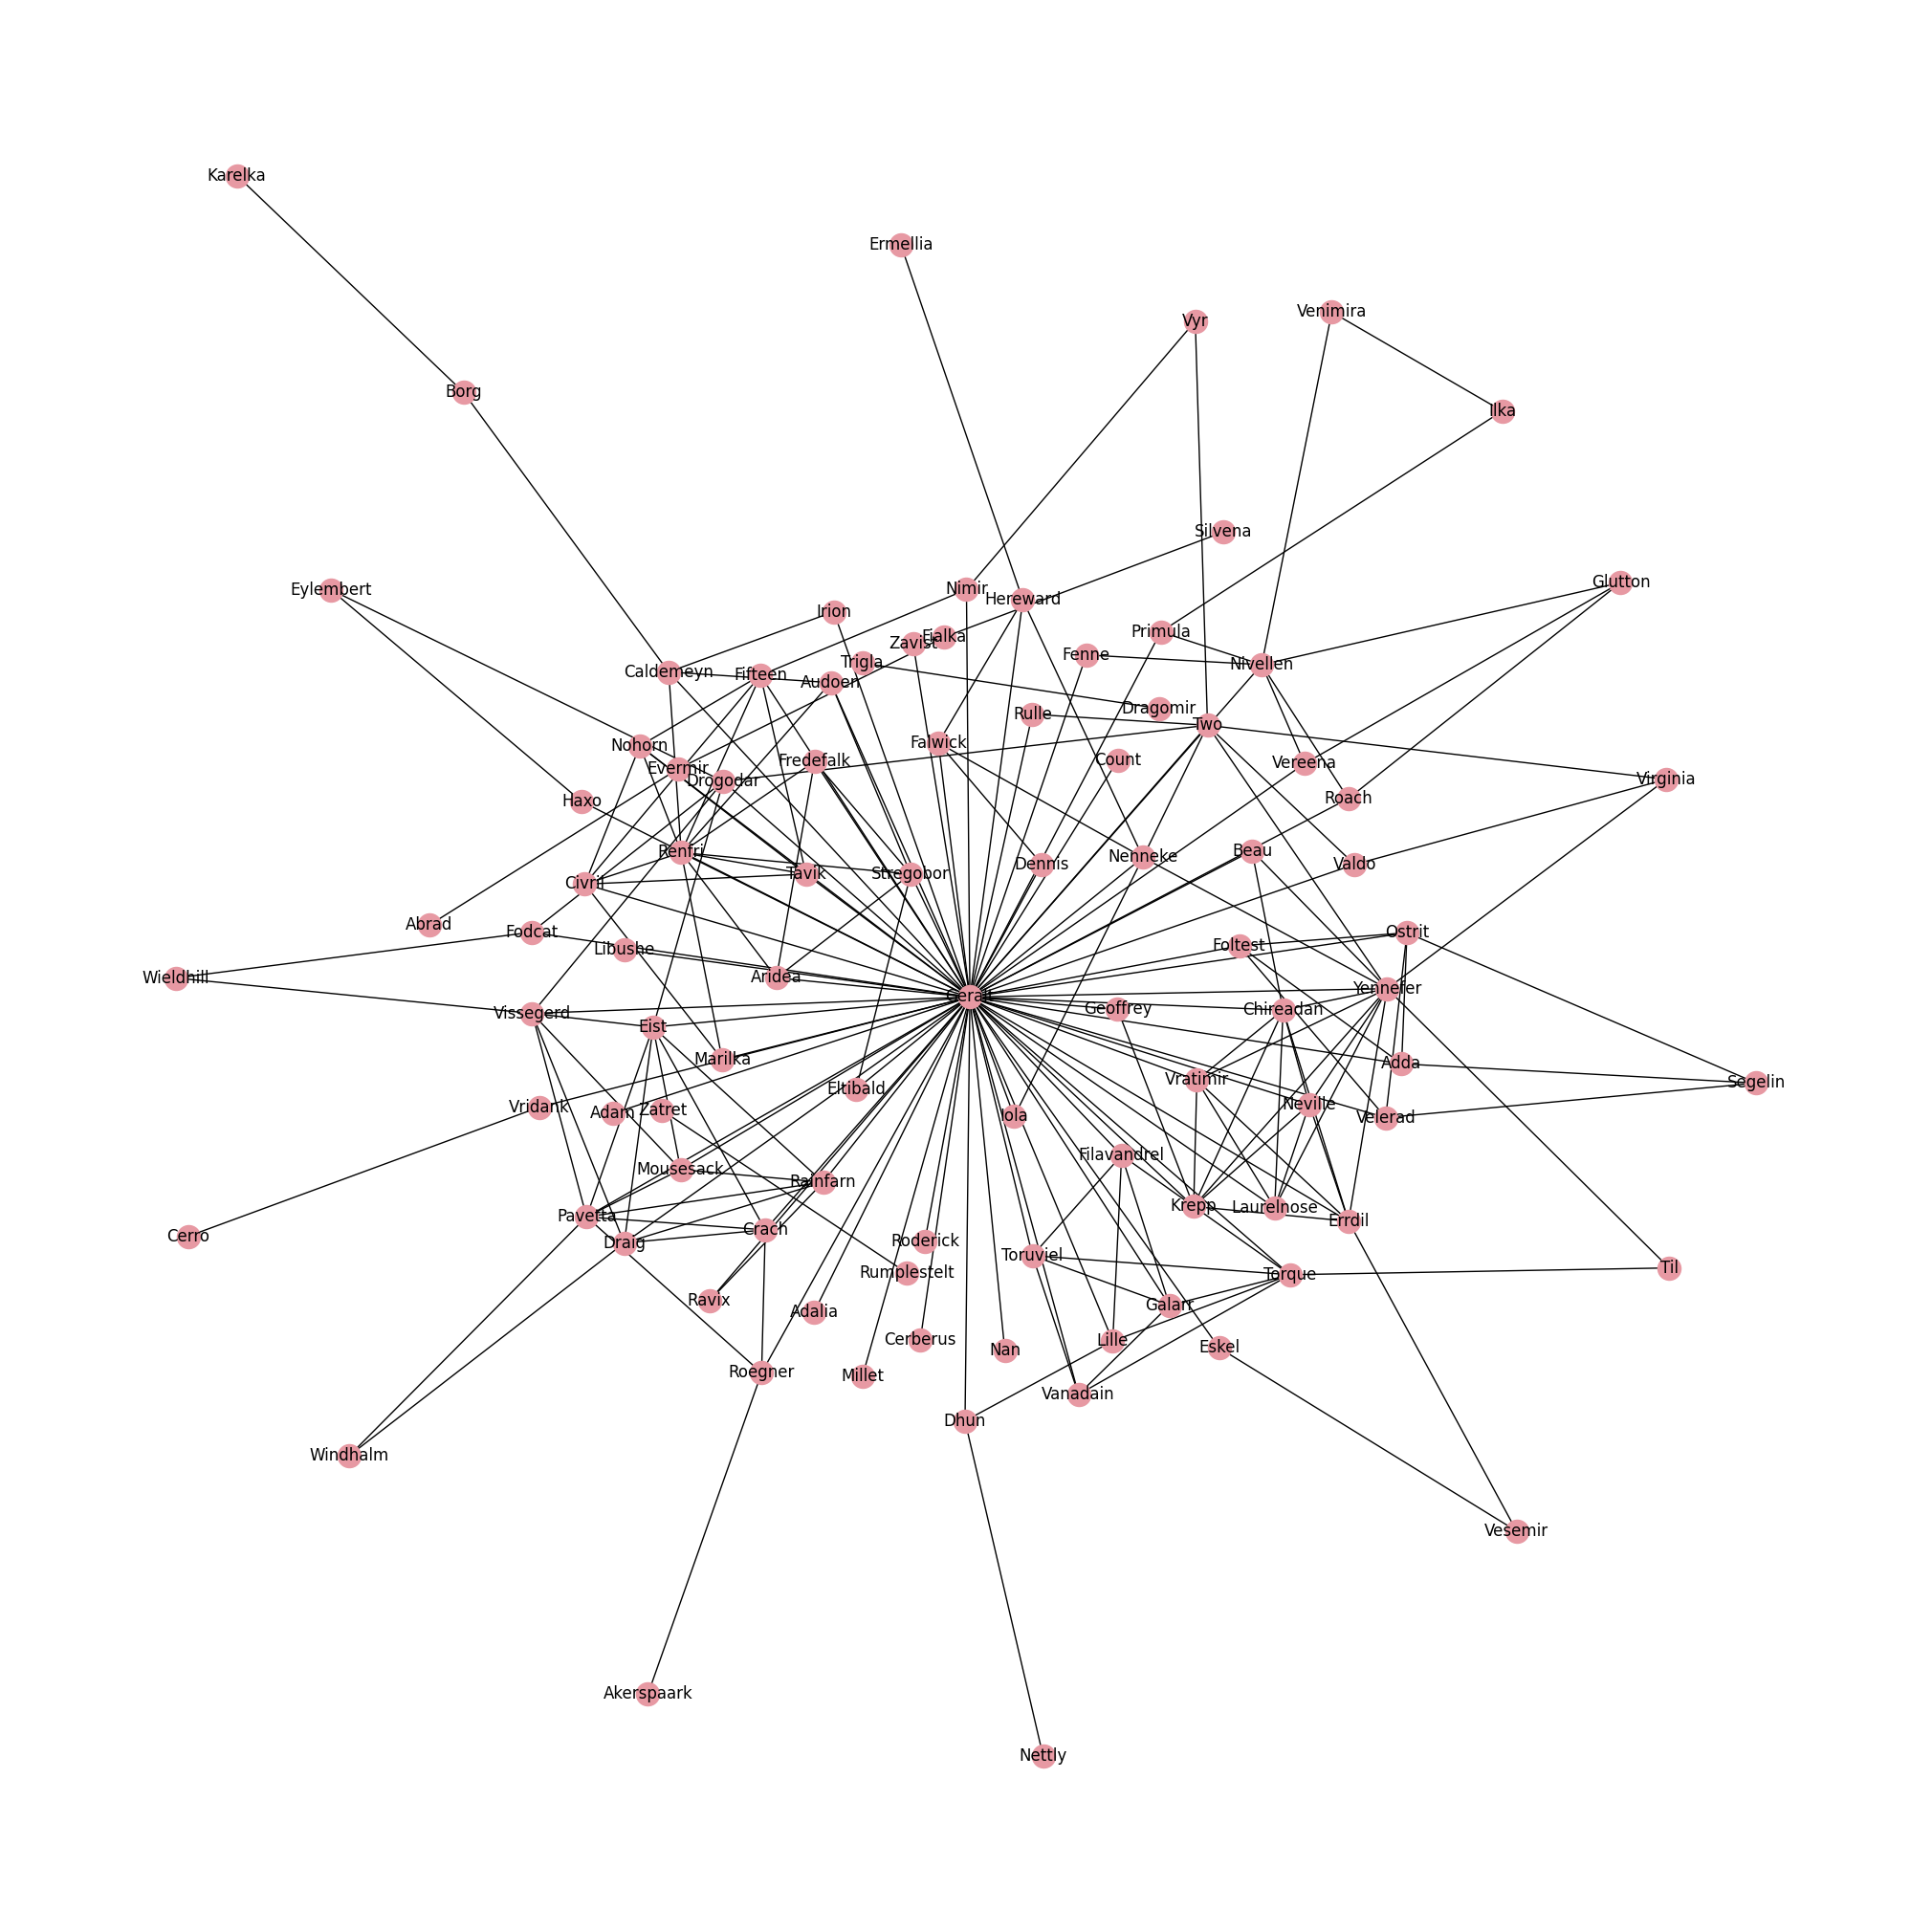

In [31]:
import scipy
plt.figure(figsize = (20,20))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = '#e799a3',edge_cmap = plt.cm.Blues,pos = pos)
plt.show()

In [32]:
##Graph visualization with pyvis

In [34]:
dict(G.degree) #degree = num of connections

{'Velerad': 4,
 'Geralt': 70,
 'Ostrit': 5,
 'Adda': 4,
 'Segelin': 3,
 'Foltest': 4,
 'Nenneke': 6,
 'Yennefer': 12,
 'Roach': 3,
 'Two': 8,
 'Rulle': 2,
 'Nivellen': 7,
 'Glutton': 3,
 'Fenne': 2,
 'Primula': 3,
 'Ilka': 2,
 'Venimira': 2,
 'Vereena': 3,
 'Falwick': 4,
 'Hereward': 4,
 'Ermellia': 1,
 'Dragomir': 1,
 'Trigla': 1,
 'Caldemeyn': 5,
 'Karelka': 1,
 'Borg': 2,
 'Irion': 2,
 'Stregobor': 6,
 'Zavist': 1,
 'Eltibald': 2,
 'Silvena': 1,
 'Fialka': 2,
 'Evermir': 2,
 'Abrad': 1,
 'Fredefalk': 4,
 'Aridea': 4,
 'Renfri': 11,
 'Vyr': 2,
 'Nimir': 3,
 'Nohorn': 5,
 'Tavik': 5,
 'Fifteen': 6,
 'Civril': 6,
 'Audoen': 4,
 'Libushe': 1,
 'Marilka': 3,
 'Adam': 1,
 'Haxo': 2,
 'Roegner': 4,
 'Drogodar': 6,
 'Eylembert': 2,
 'Pavetta': 8,
 'Eist': 8,
 'Crach': 5,
 'Draig': 6,
 'Fodcat': 3,
 'Wieldhill': 2,
 'Vissegerd': 7,
 'Vridank': 2,
 'Cerro': 1,
 'Mousesack': 5,
 'Windhalm': 2,
 'Zatret': 1,
 'Rumplestelt': 1,
 'Ravix': 2,
 'Rainfarn': 6,
 'Adalia': 1,
 'Akerspaark': 1,
 'Roder

In [35]:
from pyvis.network import Network
net = Network(notebook = True, width = '1000px', height = '800px', bgcolor = '#2e1a47', font_color = 'white')
node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G,node_degree,'size')

net.from_nx(G)
net.show("thewitcher.html")

thewitcher.html


In [36]:
##Most important characters in The Witcher

In [37]:
#Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Velerad': 0.042105263157894736,
 'Geralt': 0.7368421052631579,
 'Ostrit': 0.05263157894736842,
 'Adda': 0.042105263157894736,
 'Segelin': 0.031578947368421054,
 'Foltest': 0.042105263157894736,
 'Nenneke': 0.06315789473684211,
 'Yennefer': 0.12631578947368421,
 'Roach': 0.031578947368421054,
 'Two': 0.08421052631578947,
 'Rulle': 0.021052631578947368,
 'Nivellen': 0.07368421052631578,
 'Glutton': 0.031578947368421054,
 'Fenne': 0.021052631578947368,
 'Primula': 0.031578947368421054,
 'Ilka': 0.021052631578947368,
 'Venimira': 0.021052631578947368,
 'Vereena': 0.031578947368421054,
 'Falwick': 0.042105263157894736,
 'Hereward': 0.042105263157894736,
 'Ermellia': 0.010526315789473684,
 'Dragomir': 0.010526315789473684,
 'Trigla': 0.010526315789473684,
 'Caldemeyn': 0.05263157894736842,
 'Karelka': 0.010526315789473684,
 'Borg': 0.021052631578947368,
 'Irion': 0.021052631578947368,
 'Stregobor': 0.06315789473684211,
 'Zavist': 0.010526315789473684,
 'Eltibald': 0.021052631578947368,
 'S

<Axes: >

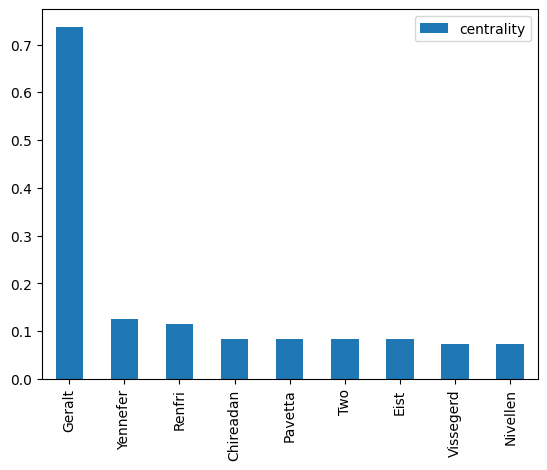

In [38]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient = 'index', columns = ['centrality'])
# Top 10 nodes
degree_df.sort_values('centrality', ascending = False)[0:9].plot(kind="bar")

<Axes: >

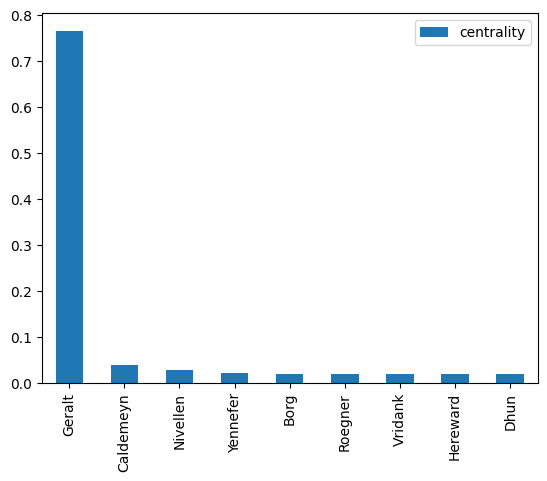

In [39]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient = 'index', columns = ['centrality'])
# Top 10 nodes
betweenness_df.sort_values('centrality', ascending = False)[0:9].plot(kind="bar")

<Axes: >

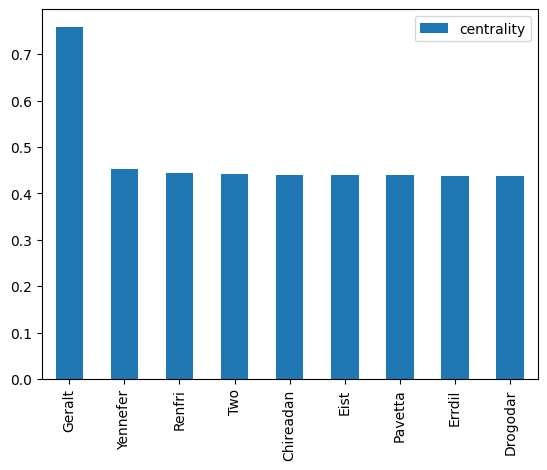

In [40]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient = 'index', columns = ['centrality'])
# Top 10 nodes
closeness_df.sort_values('centrality', ascending = False)[0:9].plot(kind="bar")

In [41]:
# Save all centrality meatures 
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')


In [42]:
## Community detection

In [56]:
import community.community_louvain as cl

In [57]:
communities = cl.best_partition(G)

In [58]:
communities

{'Velerad': 0,
 'Geralt': 8,
 'Ostrit': 0,
 'Adda': 0,
 'Segelin': 0,
 'Foltest': 0,
 'Nenneke': 8,
 'Yennefer': 3,
 'Roach': 4,
 'Two': 2,
 'Rulle': 2,
 'Nivellen': 4,
 'Glutton': 4,
 'Fenne': 4,
 'Primula': 4,
 'Ilka': 4,
 'Venimira': 4,
 'Vereena': 4,
 'Falwick': 8,
 'Hereward': 8,
 'Ermellia': 8,
 'Dragomir': 9,
 'Trigla': 9,
 'Caldemeyn': 10,
 'Karelka': 10,
 'Borg': 10,
 'Irion': 10,
 'Stregobor': 10,
 'Zavist': 8,
 'Eltibald': 10,
 'Silvena': 1,
 'Fialka': 1,
 'Evermir': 1,
 'Abrad': 1,
 'Fredefalk': 10,
 'Aridea': 10,
 'Renfri': 10,
 'Vyr': 2,
 'Nimir': 2,
 'Nohorn': 10,
 'Tavik': 10,
 'Fifteen': 10,
 'Civril': 10,
 'Audoen': 10,
 'Libushe': 8,
 'Marilka': 10,
 'Adam': 8,
 'Haxo': 5,
 'Roegner': 5,
 'Drogodar': 5,
 'Eylembert': 5,
 'Pavetta': 5,
 'Eist': 5,
 'Crach': 5,
 'Draig': 5,
 'Fodcat': 5,
 'Wieldhill': 5,
 'Vissegerd': 5,
 'Vridank': 8,
 'Cerro': 8,
 'Mousesack': 5,
 'Windhalm': 5,
 'Zatret': 6,
 'Rumplestelt': 6,
 'Ravix': 5,
 'Rainfarn': 5,
 'Adalia': 8,
 'Akerspaark'

In [59]:
nx.set_node_attributes(G, communities, 'group')

In [60]:
community_net = Network(notebook = True, width = '1000px', height = '800px', bgcolor = '#2e1a47', font_color = 'white')
community_net.from_nx(G)
community_net.show("thewitcher_communities.html")

thewitcher_communities.html
